<a href="https://colab.research.google.com/github/Gabriel-git24/Crop_prediction_model/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/archive/crop_yield.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(path)
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
columns = df.columns.to_list()

#checking for null values

for column in columns:
  nulls = df[column].isnull().sum()
  print(f"{column} has {nulls} null values.")

Region has 0 null values.
Soil_Type has 0 null values.
Crop has 0 null values.
Rainfall_mm has 0 null values.
Temperature_Celsius has 0 null values.
Fertilizer_Used has 0 null values.
Irrigation_Used has 0 null values.
Weather_Condition has 0 null values.
Days_to_Harvest has 0 null values.
Yield_tons_per_hectare has 0 null values.


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085565
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442099
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,0.442099,0.353741,-0.002591,1.000000


<Axes: >

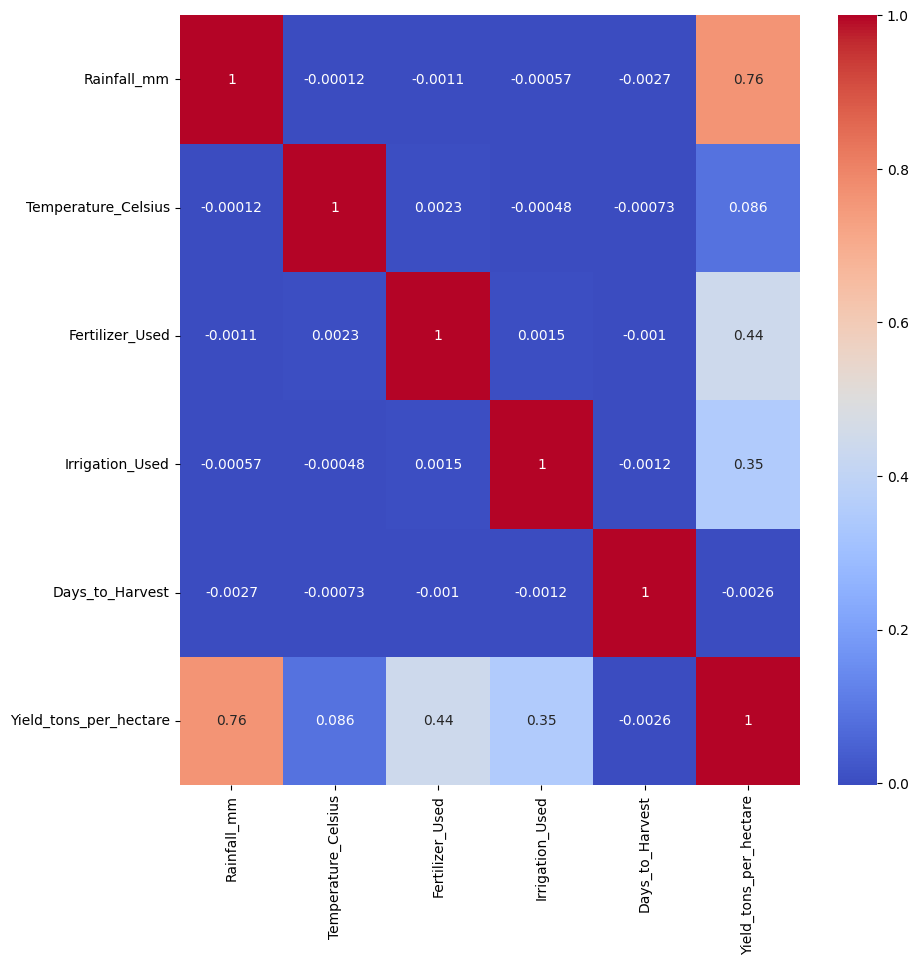

In [ ]:
# making a correlation matrix

corr_matrix = df.corr(numeric_only=True)
display(corr_matrix)

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = 'coolwarm'
)

In [ ]:
# determining unique values for non-numerical columns

def unique_values(column):
  if df[column].dtype == 'object':
    unique = df[column].unique()
    print(f"{column} has {len(unique)} unique values")
    print(unique)
    print('\n')

for column in df.columns:
  unique_values(column)

Region has 4 unique values
['West' 'South' 'North' 'East']


Soil_Type has 6 unique values
['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']


Crop has 6 unique values
['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']


Weather_Condition has 3 unique values
['Cloudy' 'Rainy' 'Sunny']




In [ ]:
X = df.copy().drop(columns="Yield_tons_per_hectare")
y = df['Yield_tons_per_hectare'].copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(),
                         LabelEncoder(),
                         OneHotEncoder(handle_unknown='ignore'))



,Yield_tons_per_hectare
0,6.555816
1,8.527341
2,1.127443
3,6.517573
4,7.248251
...,...
999995,1.347586
999996,7.311594
999997,5.763182
999998,2.070159
